<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_03_class_07_edo_system_maio_24_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!git clone https://github.com/ucfilho/Metodos_Numericos_2021 #clonar do Github
%cd Metodos_Numericos_2021
from rk4_sys import rk4

fatal: destination path 'Metodos_Numericos_2021' already exists and is not an empty directory.
/content/Metodos_Numericos_2021


In [3]:
def f( x, t ):
  # T1 = x[0];   T2 = x[1];   T2 = x[2]
  T1,T2,T3 = x
  T0 = 20
  UA = 10.0
  Cp = 2.0
  W = 100.0
  T_steam = 250
  M = 1000.0
  derivada = [0,0,0]
  derivada[0] = (W*Cp*(T0-T1)+UA*(T_steam-T1))/(M*Cp)
  derivada[1] = (W*Cp*(T1-T2)+UA*(T_steam-T2))/(M*Cp)
  derivada[2] = (W*Cp*(T2-T3)+UA*(T_steam-T3))/(M*Cp)

  return derivada


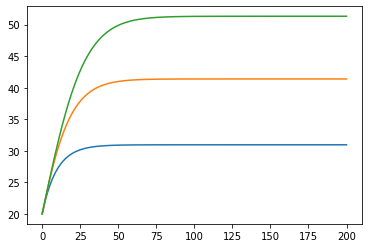

In [4]:
t0 = 0.0
x0 = [20.0,20.0,20.0]
tf = 200

t, x = rk4( f, t0, tf,x0)

plt.plot(t,x)


In [5]:
T3 = x[:,2] # totas as linhas e a terceira coluna
n = len(T3)
Tol = 1E-2
h = t[1]-t[0]
nt =int(1/h) 
for i in range(n-nt):
  delta = T3[i+nt]-T3[i]
  if(delta < Tol):
    print('TEMPO',t[i+1],'Temperatura=',T3[i+1])
    break



TEMPO 80.209 Temperatura= 51.195229142997526


In [6]:
T3 = x[:,2] # totas as linhas e a terceira coluna
n = len(T3)
Tol = 1E-6
Intervalo = 10
Time_ref = t[0]
T_ref = T3[0]
for i in range(n):
  delta_tempo = t[i]-Time_ref
  delta_Temperatura = T3[i] -T_ref
  if(delta_tempo > Intervalo):
    T_ref = T3[i]
    Time_ref = t[0]
    if(delta_Temperatura < Tol):
      print('TEMPO',t[i+1],'Temperatura=',T3[i+1])
      break


TEMPO 107.522 Temperatura= 51.30617346021169


In [9]:
T3[i]

51.30617346021169